# Imports

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix as cm
import statsmodels.formula.api as sm #for backward elimination

# Data

In [140]:
daily = pd.read_csv('Bike-Sharing/day.csv')
hourly = pd.read_csv('Bike-Sharing/hour.csv')

In [141]:
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [142]:
daily.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [143]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [144]:
# There are no empty cells in 'daily'
# daily.isna().sum()


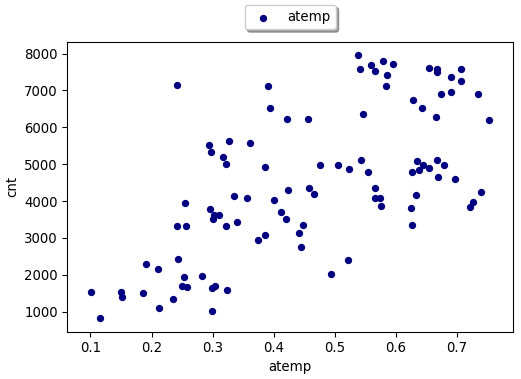

In [ ]:
# When running on 'Python with Pixiedust' kernel, can open interactive:
display(daily)
# Definitely seems to be a positive linear correlation between daily temperature (or atemp) and rental count
# Similar, weaker relationship seems plausible with season.


In [146]:
hourly.head()
# Note that 'dteday' is formatted as yyyy-mm-dd and 'temp' is a float
# Readme.txt defines 'temp' as normalized temperatures in Celsius (divided by the max of 41)
# and 'atemp' as normalized temperature feeling (divided by the max of 50).
# Also defines 'windspeed' as normalized wind speed (divided by the max of 67).

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [147]:
hourly.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [148]:
hourly.info()
# This dataset has additional 'hr' column, but all others match the daily dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [149]:
# There are no empty cells in 'hourly'
# hourly.isna().sum()


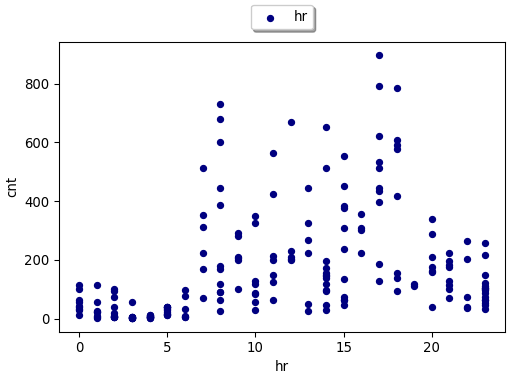

In [150]:
# When running on 'Python with Pixiedust' kernel:
display(hourly)
# Not much going on in hours 3-5am

# Building initial Multiple Linear Regressions

In [151]:
X_day = daily.iloc[:, 2:-1].values
y_day = daily.iloc[:, 15].values
X_hour = hourly.iloc[:, 2:-1].values
y_hour = hourly.iloc[:, 16].values

In [152]:
X_day_train, X_day_test, y_day_train, y_day_test = train_test_split(X_day, y_day, test_size=0.2)

In [153]:
# Basic Multiple Linear on daily dataset
regressor = LinearRegression()
regressor.fit(X_day_train, y_day_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
# Predicting test set results for daily dataset
y_day_pred = regressor.predict(X_day_test)
# cm(y_day_test, y_day_pred)

In [155]:
# Backward elimination on daily dataset
X_day = np.append(arr = np.ones((731,1)).astype(int), values = X_day, axis = 1)
X_opt = X_day[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
regressor_OLS = sm.OLS(endog = y_day, exog = X_opt).fit()
regressor_OLS.summary()
# Remove independent variables with P-value > .05:
# Keep columns 0, 1, 7, 12, 13

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.275e+31
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:48:17   Log-Likelihood:                 18354.
No. Observations:                 731   AIC:                        -3.668e+04
Df Residuals:                     717   BIC:                        -3.662e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.276e-12   8.66e-13      8.403      0.000    5.58e-12    8.98e-12
x1         -2.222e-12   2.05e-13    -10.816      0.000   -2.63e-12   -1.82e-12
x2         -1.705e-13   3.73e-13     -0.457      0.648   -9.03e-13    5.62e-13
x3         -9.326e-15   5.98e-14     -0.156      0.876   -1.27e-13    1.08e-13
x4         -1.023e-12   7.06e-13     -1.449      0.148   -2.41e-12    3.63e-13
x5         -9.948e-14   5.76e-14     -1.727      0.085   -2.13e-13    1.36e-14
x6          2.842e-14   4.27e-13      0.067      0.947    -8.1e-13    8.67e-13
x7          5.826e-13   2.86e-13      2.037      0.042     2.1e-14    1.14e-12
x8         -1.819e-12   4.91e-12     -0.370      0.711   -1.15e-11    7.82e-12
x9          2.728e-12   5.57e-12      0.490      0.624    -8.2e-12    1.37e-11
x10        -1.137e-12    1.1e-12     -1.030      0.303    -3.3e-12    1.03e-12
x11        -1.819e-12   1.63e-12     -1.118      0.264   -5.01e-12    1.37e-12
x12            1.0000   3.08e-16   3.24e+15      0.000       1.000       1.000
x13            1.0000   1.77e-16   5.66e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      299.114   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.435
Skew:                          -0.208   Prob(JB):                     3.70e-10
Kurtosis:                       1.881   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
X_opt = X_day[:, [0, 1, 7, 12, 13]]
regressor_OLS = sm.OLS(endog = y_day, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.854e+31
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:48:17   Log-Likelihood:                 18196.
No. Observations:                 731   AIC:                        -3.638e+04
Df Residuals:                     726   BIC:                        -3.636e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.862e-12   6.03e-13     16.350      0.000    8.68e-12     1.1e-11
x1         -3.222e-12   1.39e-13    -23.141      0.000    -3.5e-12   -2.95e-12
x2         -5.542e-13   2.71e-13     -2.044      0.041   -1.09e-12   -2.19e-14
x3             1.0000   2.24e-16   4.46e+15      0.000       1.000       1.000
x4             1.0000   1.07e-16   9.34e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     1461.358   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.973
Skew:                          -0.035   Prob(JB):                     5.18e-12
Kurtosis:                       1.696   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
X_opt = X_day[:, [0, 1, 4, 5, 12, 13]]
regressor_OLS = sm.OLS(endog = y_day, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.145e+31
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:49:59   Log-Likelihood:                 18120.
No. Observations:                 731   AIC:                        -3.623e+04
Df Residuals:                     725   BIC:                        -3.620e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.263e-12   5.06e-13      8.425      0.000    3.27e-12    5.26e-12
x1          -2.73e-12   1.53e-13    -17.845      0.000   -3.03e-12   -2.43e-12
x2         -5.571e-12    9.4e-13     -5.924      0.000   -7.42e-12   -3.72e-12
x3         -3.553e-14   7.77e-14     -0.457      0.648   -1.88e-13    1.17e-13
x4             1.0000   2.47e-16   4.05e+15      0.000       1.000       1.000
x5             1.0000   1.17e-16   8.54e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       39.365   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.678
Skew:                           0.565   Prob(JB):                     1.99e-10
Kurtosis:                       3.435   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
X_opt = X_day[:, [0, 1, 4, 12, 13]]
regressor_OLS = sm.OLS(endog = y_day, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.868e+31
Date:                Sun, 30 Sep 2018   Prob (F-statistic):               0.00
Time:                        14:50:16   Log-Likelihood:                 18373.
No. Observations:                 731   AIC:                        -3.674e+04
Df Residuals:                     726   BIC:                        -3.671e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.249e-12   3.21e-13     13.222      0.000    3.62e-12    4.88e-12
x1         -2.312e-12   1.08e-13    -21.392      0.000   -2.52e-12    -2.1e-12
x2         -2.558e-12   6.61e-13     -3.868      0.000   -3.86e-12   -1.26e-12
x3             1.0000   1.74e-16   5.73e+15      0.000       1.000       1.000
x4             1.0000   8.27e-17   1.21e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       29.689   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.251
Skew:                           0.432   Prob(JB):                     7.33e-07
Kurtosis:                       2.576   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0 Season
1 Year
4 Holiday
7 Weathersit
12 Casual
13 Registered